<h1><center>Einführung in die Neuroinformatik - Übungsblatt 9</center></h1>
<h2><center>Dominik Authaler, Marco Deuscher und Carolin Schindler</center></h2>
<h2><center>Gruppe Q</center></h2>
<h2><center>Juni 2019</center></h2>
 
## Aufgabe 1: Gewichtsinitialisierung

#### 1.) Betrachten, was bei ungünstiger Initialisierung passiert
##### a) Wie ist $u_i^{(1)}$ verteilt?
$u_i^{(1)} = \sum_{k=1}^m x_k\cdot w_{ki}^{(1)} + b_i^{(1)} = \sum_{k=1}^m x_k\cdot N(0, 1) + 0 = \sum_{x_k = 1} N(0,1) = N(\frac{m}{2}\cdot 0, \sqrt{\frac{m}{2}\cdot 1^2}) = N(0, \sqrt{\frac{m}{2}}) = N(0, 5\sqrt{6}) \approx N(0, 12.25)$
##### b) Zu welchem Problem kann das eben berechnete Ergebnis führen?
$y_i^{(1)} = f(u_i^{(1)}) = \tanh{u_i^{(1)}}$ und $|\tanh{x}| = 1$ für etwa $|x| > 2$. Daher ändert sich die Ausgabe für $u_i^{(1)} > 2$ nicht, obwohl sich $u_i^{(1)}$ geändert hat. Da für N(0, 12.25) Werte von ca. -30 bis +30 wahrscheinlich sind und Werte im Intervall $[-2, 2]$ kaum wahrscheinlicher sind als Werte außerhalb des Intervalls, ist die Wahrscheinlichkeit hoch, dass $|y_i^{(1)}|$ konstant $1$ ist und somit das Lernen keinen Effekt zeigt.
##### c) Wie ist $u_i{(1)}$ mit dieser Konfiguration verteilt?
$u_i^{(1)} = N(\frac{m}{2}\cdot 0, \sqrt{\frac{m}{2}\cdot \frac{1}{n_{in}}}) = N(0, \sqrt{\frac{m}{2\cdot m}}) = N(0, \sqrt{\frac{1}{2}}) \approx N(0, 0.707)$
##### d) Welche Vorteile hat diese Verteilung für die Initialisierung der Gewichte im Vergleich zu einer unveränderten Normalisierung?
Der Vorteil liegt darin, dass z.B. hier Werte außerhalb des Intervall $[-2, 2]$ mit einer Wahrscheinlichkeit von 0%, also nie auftreten und dafür die anderen Werte, insbesondere in der Nähe von Null, mit einer höheren Wahrscheinlichkeit auftreten. Dadurch tritt das oben beschrieben Problem auch nicht im kleinen Stil bzw. durch "unglücklichen Zufall" auf. 

#### 2. Welche Vertelung passt zur Initialierungsstrategier $I$ und welche zu $II$?
A: Standardnormalverteilung $N(0,1)$    
B: skalierte Standardnormalverteilung $N(0, \frac{1}{\sqrt{n_{in}}})$  
Für A ist $|y_i^{(1)}| \approx 1$ am wahrscheinlichsten und da $y_i^{(1)} = f(u_i^{(1)}) = \tanh{u_i^{(1)}}$, muss $|u_i^{(1)}| > 2$ sehr wahrscheinlich sein. Für B sind die Werte von $y_i^{(1)}$ im Intervall $[-1, 1]$ ziemlich gleichverteilt, daher muss $|u_i^{(1)}| < 2$ sein und für Werte um Null etwa die gleiche Auftrittswahrscheinlichkeit besitzen. Daher ergibt sich oben genannte Zuordnung.

#### 3. Erkläre, welches Problem man damit zu lösen versucht und warum die Gleichung einen möglichen Kompromiss darstellt. 
$$
\begin{align}
\frac{\partial E_c}{\partial w_{ki}^{(1)}} = \sum_{j=1}^n(y_j^{(2)} - t_j) \cdot w_{ij}^{(2)} \cdot f'(u_i^{(1)}) \cdot x_k
\end{align}
$$
Anhand obiger Gleichung wird deutlich, dass hier bei verschieden großen Schichten zwei unterschiedlich parametrisierte Normalverteilungen aufeinandertreffen. Unter Anwendung der aus den vorherigen Teilaufgaben erarbeiteten Lösung wäre die Normalverteilung der ersten Schicht am Parameter $m$ ausgerichtet, die der zweiten Schicht dagegen an $h$. Für $ m \neq h$ ergibt sich daher wieder die bekannte Problematik. Um sich nicht auf Netze mit identischer Neuronenanzahl in allen Schichten limitieren zu müssen, bietet sich daher in diesem Fall das arithmetische Mittel von $m$ und $h$ an. Richtet man die Normalverteilung an diesem aus, so treffen die in der obigen Formel keine verschiedenen Normalverteilungen mehr aufeinander. Allerdings taucht die Problematik dafür nun wieder in den einzelnen Schichten auf, wegen dem Mittelwert aber in abgeschwächter im Vergleich zur Nutzung von einem der Parametern $m$ und $h$ für beide Schichten. 

## Aufgabe 2: Regularisierung

#### 1. veränderte Kostenfunktion
##### a) Zeige, dass sich für ein einzelnes Gewicht die neue Lernregel ergibt.
$\frac{\partial E(w(t))}{\partial w_{ij}^{(l)}} = \frac{\partial E_0(w(t))}{\partial w_{ij}^{(l)}} + \frac{\partial}{\partial w_{ij}^{(l)}} (\frac{\lambda}{2}\sum_{l=1}^{L}\sum_{i}\sum_{j}(w_{ij}^{(l)})^2) = \frac{\partial E_0(w(t))}{\partial w_{ij}^{(l)}} + \lambda\cdot w_{ij}^{(l)}$  
$w(t+1) = w(t) -\eta\cdot\nabla E(w(t)) = w(t) -\eta\cdot (\nabla E_0(w(t)) + \lambda\cdot w(t)) = (1-\eta\cdot\lambda)\cdot w(t) - \eta\cdot\nabla E_0(w(t))$
##### b) Gewichte mit weight decacy
###### i) Welchen Wert nimmt das Gewicht bei $w(10)$ an?
$w(t+1) = (1-0,8\cdot0,5)\cdot w(t) = 0,6\cdot w(t)$  
$w(10) = 0,6\cdot w(9) = 0,6\cdot(0,6\cdot w(8)) = 0,6^{10}\cdot w(0) \approx 0,0121$  
[$w(t+1) = 0,6^{t+1}\cdot w(0)$]
###### ii) Mit welcher Rate nimmt das Gewicht ab?
Das Gewicht nimmt exponentiell ab.
###### iii) Zeige, dass sich das Gewicht in zunehmenden Iterationen der Null annähert.
$\lim_{t \to \infty} w(t) = \lim_{t \to \infty} 0,6^{t}\cdot w(0) = 2\cdot\lim_{t \to \infty} 0,6^{t} = 2\cdot 0 = 0$
###### iv) Argumentiere, warum die Gleichung nun nicht mehr notwendigerweise gilt.
Der obige Grenzwert ergab sich vor allem, weil das Gewicht aufgrund des exponentiellen Zerfalls streng monoton abnahm. Verschwindet der Gradient nicht, so ist dies aber nicht mehr gewährleistet, da nun innerhalb einer Iteration das Gewicht durch die Subtraktion von $-\eta \cdot \nabla E_0(w(t))$ auch wieder zu nehmen kann. 
##### c) Wenn wir nun jedoch die Lernregel mit Regularisierung verwenden, hilft uns das dann dabei, das Problem aus Aufgabe 1 einzudämmen und wenn ja warum?
XXX Muss noch überprüft werden, lediglich eine Vermutung 
Ursache für das bisher beschriebene Problem ist vor allem die "Größe" der Gewichte in Zusammenhang mit ihrer großen Anzahl. In Folge dessen können die dendritischen Potenziale sehr groß werden, wodurch sich aufgrund von $tanh(x)\xrightarrow{x\to\infty}1$ bzw. $tanh(x)\xrightarrow{x\to-\infty}-1$ die Problematik fürs Lernen ergibt. Durch die Regulariesierung können die Gewichte verringert werden, sodass auch das dendritische Potential geringer wird und sich die Problematik entschärft. 

#### 2. Behauptung stützen
Lernregeln aus dem dritten Übungsblatt (Batch-Variante): 
$$
\begin{align}
    &w(t+1) = w(t) + \eta \cdot \sum_{\mu=1}^M(T_\mu - (f(w(t) \cdot x_\mu + b(t))\cdot f'(w(t)\cdot x_\mu + b(t)) \cdot x_\mu \\
    &b(t+1) = b(t) + \eta \cdot \sum_{\mu=1}^M(T_\mu - (f(w(t) \cdot x_\mu + b(t))\cdot f'(w(t)\cdot x_\mu + b(t))
\end{align}
$$
Anhand der obigen Lernregeln wird schnell deutlich, dass in der Lernregel für $b$ der Faktor $x_\mu$ fehlt. Verrauschte Trainingssamples erhalten also lediglich Einfluss auf den Bias über die Netzwerkantwort und das dendritische Potential, nicht aber wie bei den Gewichten auf direktem Wege als Faktor. Daher ist der Bias $b$ deutlich unempfindlicher gegen verrauschte Trainingssamples und die seperate Betrachung damit gerechtfertigt. 
#### 3. Skizziere im zweidimensionalen Raum wie sich die Fehlerfunktion für steigendes $\lambda$ verhält.
XXX

#### 4. Effekt der Regularisierung anhand eines Beispiels 

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib as mpl
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import regularizers
import tensorflow.keras.backend as K
from sklearn.preprocessing import StandardScaler


In [2]:
area = np.array([68.9, 40.5, 33.42, 73, 74.11, 76, 61.51, 52, 70, 76.6, 20, 32, 58, 45, 27, 33], np.float64)
area = area.reshape(-1, 1)
price = np.array([720, 520, 420, 955, 785, 897, 830, 670, 900, 885, 480, 620, 860, 550, 290, 320], np.float64)

Funktion zum Anzeigen der Daten, damit sichtbar wird, was der Standarisierungsprozess bewirkt:

In [3]:
def plotData(X, y, title="", x_label="", y_label=""):
    fig = plt.figure(title, figsize=(16, 6))

    ax = plt.axes()
    
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

    # The scatter plot
    ax.scatter(X, y, alpha=0.5, marker='o', s=15, lw=0, c='blue')

    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    

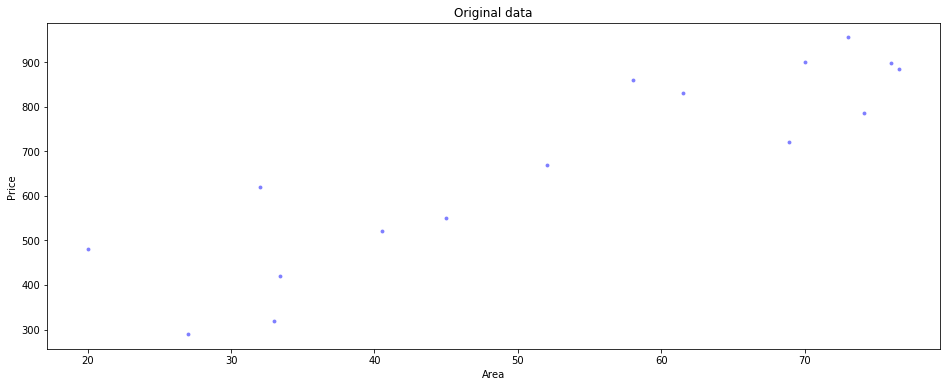

In [4]:
plotData(area, price, "Original data", "Area", "Price")

Standarisierung der Daten:

[52.565]
[19.00398149]


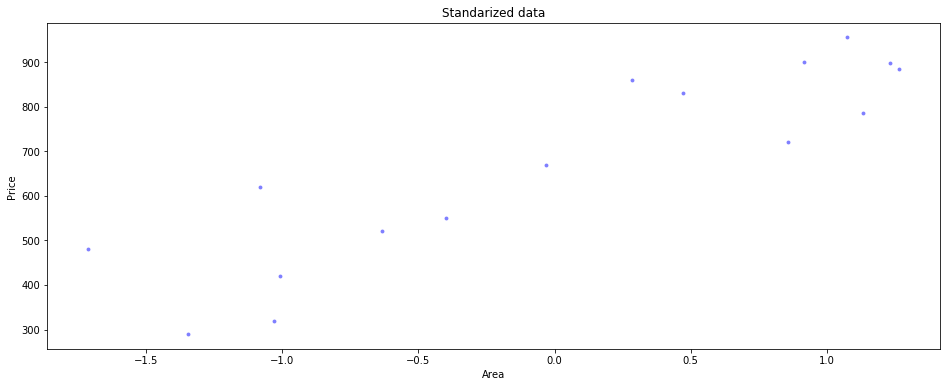

In [5]:
scaler = StandardScaler().fit(area)
#print(scaler.mean_)
#print(scaler.scale_)

area_scaled = scaler.transform(area)

plotData(area_scaled, price, "Standarized data", "Area", "Price")

Methode zur Konfiguration der Netze mit anschließendem Training:

In [29]:
def train_network(data, T, l2_reg, visRange):
    inputNeurons = 1
    hiddenNeurons = 50
    outputNeurons = 1
    mySeed = 42
    epochs = 3000
    
    # Start fresh and at least try to get reproducible
    tf.reset_default_graph()
    K.clear_session()
    tf.set_random_seed(mySeed)
    np.random.seed(mySeed)
    
    session = tf.Session(config=None)
    tf.keras.backend.set_session(session)
    
    X = tf.placeholder(tf.float32, shape=[None])
    
    model = tf.keras.models.Sequential()
    
    #init = tf.keras.initializers.RandomUniform(minval=-0.5, maxval=0.5, seed=mySeed)
    init = tf.contrib.layers.xavier_initializer();
    acti = 'tanh'  
    
    #Hidden Layer
    model.add(tf.keras.layers.Dense(units=hiddenNeurons, input_dim = inputNeurons, activation=acti, kernel_initializer = init)) 
    
    #Output Layer
    model.add(tf.keras.layers.Dense(units=outputNeurons, input_dim = hiddenNeurons, kernel_initializer = init)) 
    
    adam = tf.keras.optimizers.Adam(lr=0.1)
    
    test_prediction = 0
    
    with session.as_default():
        with session.graph.as_default():
            #Hier könnte über die Variable loss ein eigener Term eingebracht werden, aber wie nimmt man das letzte Neuron davon aus?!
            model.compile(loss='mse',optimizer=adam)
            history = model.fit(data,T,epochs=epochs, verbose=0)
            
            #Wie muss man hier die Daten übergeben, damit keine Fehlermeldung kommt?! 
            #test_prediction = session.run(model, feed_dict={X: visRange})
            
    return test_prediction;

Training der beiden Netzwerke und anschließende Anzeige der Daten:

In [56]:
def visualize(data, inputRange, results, l2_regs):
    fig = plt.figure("Visualisierung", figsize=(16, 6))

    ax = plt.axes()
    
    ax.set_title("Visualisierung")
    ax.set_xlabel(r'Area [$m^2$]')
    ax.set_ylabel(r'Cold rent [€]')
    
    print(data[0])
    print(data[1])
    
    ax.scatter(data[0], data[1], alpha=0.5, marker='o', s=15, lw=0, label="data")
    
    print(len(results))
    print(len(l2_regs))
    
    for i in range(0, min(len(results), len(l2_regs))):
        text = r'$\lambda = $' + str(l2_regs[i])
        ax.scatter(inputRange, results[i], alpha=0.5, marker='o', s=15, lw=0, label=text)

    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    plt.legend(loc=2)

[[68.9 ]
 [40.5 ]
 [33.42]
 [73.  ]
 [74.11]
 [76.  ]
 [61.51]
 [52.  ]
 [70.  ]
 [76.6 ]
 [20.  ]
 [32.  ]
 [58.  ]
 [45.  ]
 [27.  ]
 [33.  ]]
[720. 520. 420. 955. 785. 897. 830. 670. 900. 885. 480. 620. 860. 550.
 290. 320.]
6
2


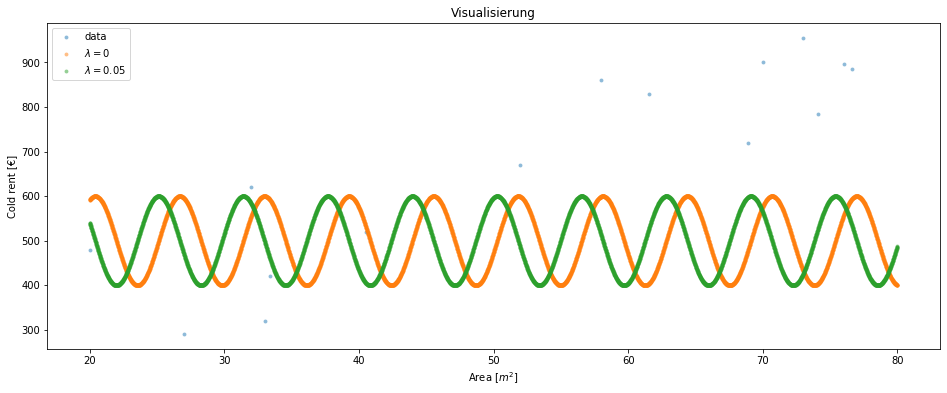

In [61]:
start = 20
end = 80
step = 0.01

inputRange = np.arange(start, end, step).tolist();
lambdas = [0, 0.05]

for i in range(len(lambdas)):
    res.append(train_network(area, price, lambdas[i], inputRange))

visualize([area, price], inputRange, res, lambdas)